# Introduction:

In this project, we are going to look at a dataset from Kaggle that consists of restaurant listings from Zomato in Bangalore. 

In this notebook you will find:
- Loading Data
    * Import libraries that are needed, and load data as csv
- Cleaning Data
    * Removing unnecessary columns
    * Renaming selected columns
    * Removing duplicate columns
    * Working with missing data - dropping & imputation 
    * Further cleaning of column values
- Visualization
    * Visualizing using plots to show information about the cleaned data, and relations between the features. 
   

# Loading Data:

Let's first read the data:

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv('zomato.csv')

To find out what columns and rows, and how many of them are present in our dataset:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

It seems like there are a lot of unnecessary columns - some of them are repititive. So I am only going to pick a subset of these columns to work with. 

In [3]:
#columns that I will need to do my analysis
columns_needed = ["name","rate","votes","location","approx_cost(for two people)","cuisines","rest_type","reviews_list"]

zomato = data.loc[:,columns_needed]


In [4]:
#edited dataframe looks like this:
zomato.head()

,name,rate,votes,location,approx_cost(for two people),cuisines,rest_type,reviews_list
0,Jalsa,4.1/5,775,Banashankari,800,"North Indian, Mughlai, Chinese",Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,4.1/5,787,Banashankari,800,"Chinese, North Indian, Thai",Casual Dining,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,3.8/5,918,Banashankari,800,"Cafe, Mexican, Italian","Cafe, Casual Dining","[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,3.7/5,88,Banashankari,300,"South Indian, North Indian",Quick Bites,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,3.8/5,166,Basavanagudi,600,"North Indian, Rajasthani",Casual Dining,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


# Cleaning Data:

First thing's first, changing the names of the some of the columns in order to make it cleaner and easier to recall.

In [5]:
#Rename columns for cleanliness/ease of reading 
new_column_names = {
    "rate":"rating",
    "approx_cost(for two people)":"avg_price",
    "rest_type":"type",
    "reviews_list":"reviews"
}

zomato = zomato.rename(new_column_names,axis=1)
#updated columns
zomato.columns

Index(['name', 'rating', 'votes', 'location', 'avg_price', 'cuisines', 'type',
       'reviews'],
      dtype='object')

Often in datasets there will be rows that repeat. In other words, there are duplicate rows present that we won't need. To make the dataset cleaner, we will be getting rid of the extra rows. 

We can view the duplicate columns like so:

In [6]:
#Way to view duplicate columns

dups = zomato.duplicated(["name","location"])
zomato[dups]

,name,rating,votes,location,avg_price,cuisines,type,reviews
14,San Churro Cafe,3.8/5,918,Banashankari,800,"Cafe, Mexican, Italian","Cafe, Casual Dining","[('Rated 3.0', ""RATED\n Ambience is not that ..."
44,Onesta,4.6/5,2556,Banashankari,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 5.0', 'RATED\n I personally really l..."
104,CAFE NOVA,3.2/5,11,Banashankari,600,"Cafe, Bakery",Cafe,"[('Rated 1.0', ""RATED\n No ventilation. Smoke..."
193,CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,4.1/5,402,Banashankari,500,Cafe,Cafe,"[('Rated 4.0', 'RATED\n We ended up here on a..."
199,The Vintage Cafe,3.0/5,62,Banashankari,400,"Cafe, French, North Indian",Cafe,"[('Rated 2.0', ""RATED\n This is a tiny cafÃ\..."
212,Smacznego,4.2/5,504,Banashankari,550,"Cafe, Mexican, Italian, Momos, Beverages",Cafe,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3..."
230,Srinathji's Cafe,3.8/5,148,Basavanagudi,550,"North Indian, Cafe, Chinese, Fast Food","Casual Dining, Cafe","[('Rated 5.0', 'RATED\n No words for the pane..."
239,Rosewood International Hotel - Bar & Restaurant,3.6/5,8,Mysore Road,800,"North Indian, South Indian, Andhra, Chinese",Casual Dining,"[('Rated 5.0', 'RATED\n Awesome food ??Great ..."
257,Timepass Dinner,3.8/5,286,Basavanagudi,600,North Indian,Casual Dining,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/..."
268,My Tea House,3.6/5,62,Banashankari,600,"Italian, Fast Food, Cafe, European","Quick Bites, Cafe","[('Rated 4.0', ""RATED\n So, went here with fr..."


There seems to be a trend - each different location of certain restaurants has 3 different entries. Let's make sure this is true:

In [7]:
#check to see how many duplicates, each different location seems to have 3 entries
zomato[zomato["name"]=="Onesta"].head(6)

,name,rating,votes,location,avg_price,cuisines,type,reviews
7,Onesta,4.6/5,2556,Banashankari,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 5.0', 'RATED\n I personally really l..."
44,Onesta,4.6/5,2556,Banashankari,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 5.0', 'RATED\n I personally really l..."
557,Onesta,4.6/5,2556,Banashankari,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 5.0', 'RATED\n I personally really l..."
909,Onesta,4.4/5,4381,JP Nagar,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 2.0', 'RATED\n Unhygienic place , ch..."
1015,Onesta,4.4/5,4381,JP Nagar,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 2.0', 'RATED\n Unhygienic place , ch..."
2292,Onesta,4.4/5,4381,JP Nagar,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 2.0', 'RATED\n Unhygienic place , ch..."


Let's go ahead and drop the duplicates like so:

In [8]:
zomato = zomato.drop_duplicates(["name","location"])

#compare to previous dataframe to see difference - every location is different 
zomato[zomato["name"]=="Onesta"].head(6)

,name,rating,votes,location,avg_price,cuisines,type,reviews
7,Onesta,4.6/5,2556,Banashankari,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 5.0', 'RATED\n I personally really l..."
909,Onesta,4.4/5,4381,JP Nagar,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 2.0', 'RATED\n Unhygienic place , ch..."
2497,Onesta,4.6/5,1755,Basavanagudi,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 4.0', 'RATED\n A perfect place for h..."
3850,Onesta,4.4/5,3738,HSR,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 3.0', ""RATED\n Been there multiple t..."
6742,Onesta,4.3/5,840,Brookefield,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 2.0', 'RATED\n Earlier it was good b..."
6995,Onesta,4.6/5,2750,Marathahalli,600,"Pizza, Cafe, Italian","Casual Dining, Cafe","[('Rated 5.0', ""RATED\n Service 5/5\nFood 5/5..."


The new dataframe size dropped from over 50,000 rows to:-

In [9]:
zomato.shape[0]

12151

After dropping the duplicate columns, we can move onto checking how many null/missing values are present in the dataframe now:

In [10]:
#explore new,edited dataframe
zomato.isnull().sum()

name            0
rating       2358
votes           0
location       11
avg_price      61
cuisines       21
type           61
reviews         0
dtype: int64

From the above, there are over 2000 missing values in the 'rating' column. This column has the most missing values, with just under a sixth of the total values missing. Let's take a closer look at the 'rating' column.

In [ ]:



#replace reviews where value is '[]' with null - makes it easier to work with
# clean rating values (remove '/5')

# drop rows where rating, votes & reviews are null - can't impute from anywhere
#drop rows where cuisine is null - can't replace values with anything

#use mean value of avg_price per location to fill in null values of avg_price column


The following code prints out all the unique values, with their respective counts (the number of times it appears in all the rows), in the column 'rating'. This gives us a better idea of the data in the 'rating' column.

In [12]:
zomato['rating'].value_counts(dropna=False)

NaN       2358
NEW        751
3.7/5      685
3.9/5      658
3.6/5      637
3.8/5      628
3.5/5      536
4.0/5      497
3.4/5      488
3.3/5      449
4.1/5      409
3.2/5      382
3.1/5      332
4.2/5      260
3.0/5      211
4.3/5      204
3.7 /5     197
3.9 /5     174
3.8 /5     171
2.9/5      166
3.3 /5     157
3.4 /5     144
3.6 /5     142
3.5 /5     141
4.0 /5     137
4.4/5      130
3.2 /5     124
2.8/5      116
4.1 /5      87
3.1 /5      79
          ... 
2.7/5       66
3.0 /5      56
4.3 /5      55
2.9 /5      52
2.6/5       48
4.6/5       40
4.4 /5      29
4.5 /5      25
4.7/5       25
2.8 /5      23
2.7 /5      18
2.4/5       18
2.5/5       17
2.6 /5      13
2.5 /5       9
2.3/5        8
4.8/5        8
4.9/5        7
4.6 /5       6
2.2/5        6
4.8 /5       5
4.7 /5       5
2.4 /5       5
-            5
2.1/5        4
2.3 /5       3
4.9 /5       2
2.0 /5       1
1.8/5        1
2.0/5        1
Name: rating, Length: 62, dtype: int64

The 'NEW' value appears 751 over all the rows in the 'rating' column. This value won't provide us with much help in an analysis so let's replace is with the NaN value, like so:

In [13]:
#replace 'NEW' values in 'rating' column and check again
zomato['rating'] = zomato['rating'].replace('NEW',np.nan)
zomato['rating'].value_counts(dropna=False)

NaN       3109
3.7/5      685
3.9/5      658
3.6/5      637
3.8/5      628
3.5/5      536
4.0/5      497
3.4/5      488
3.3/5      449
4.1/5      409
3.2/5      382
3.1/5      332
4.2/5      260
3.0/5      211
4.3/5      204
3.7 /5     197
3.9 /5     174
3.8 /5     171
2.9/5      166
3.3 /5     157
3.4 /5     144
3.6 /5     142
3.5 /5     141
4.0 /5     137
4.4/5      130
3.2 /5     124
2.8/5      116
4.1 /5      87
3.1 /5      79
4.2 /5      73
          ... 
2.7/5       66
3.0 /5      56
4.3 /5      55
2.9 /5      52
2.6/5       48
4.6/5       40
4.4 /5      29
4.5 /5      25
4.7/5       25
2.8 /5      23
2.7 /5      18
2.4/5       18
2.5/5       17
2.6 /5      13
2.5 /5       9
2.3/5        8
4.8/5        8
4.9/5        7
4.6 /5       6
2.2/5        6
4.8 /5       5
4.7 /5       5
2.4 /5       5
-            5
2.1/5        4
2.3 /5       3
4.9 /5       2
2.0 /5       1
1.8/5        1
2.0/5        1
Name: rating, Length: 61, dtype: int64

Notice how the NaN value increased from 2358 to 3109 as all the 'NEW' values got converted. We should get rid of the extra '/5' at the end of each value in the 'rating' column as it won't be possible calculations in the future with such a format. 

In [14]:
#removing the '/5' at the end of the string in 'rating' column

zomato['rating'] = zomato['rating'].replace('/5',"",regex=True)
zomato.head(5)


,name,rating,votes,location,avg_price,cuisines,type,reviews
0,Jalsa,4.1,775,Banashankari,800,"North Indian, Mughlai, Chinese",Casual Dining,"[('Rated 4.0', 'RATED\n A beautiful place to ..."
1,Spice Elephant,4.1,787,Banashankari,800,"Chinese, North Indian, Thai",Casual Dining,"[('Rated 4.0', 'RATED\n Had been here for din..."
2,San Churro Cafe,3.8,918,Banashankari,800,"Cafe, Mexican, Italian","Cafe, Casual Dining","[('Rated 3.0', ""RATED\n Ambience is not that ..."
3,Addhuri Udupi Bhojana,3.7,88,Banashankari,300,"South Indian, North Indian",Quick Bites,"[('Rated 4.0', ""RATED\n Great food and proper..."
4,Grand Village,3.8,166,Basavanagudi,600,"North Indian, Rajasthani",Casual Dining,"[('Rated 4.0', 'RATED\n Very good restaurant ..."


Moving on to the 'reviews' column, there are rows that have '[]' values in it. Let's replace them with NaN instead:

In [15]:
#replace '[]' values in column 'reviews' with nan
zomato['reviews']=zomato['reviews'].replace('\[\]',np.nan,regex=True)

In order to understand where exactly our missing data is, we can visualize it by using the seaborn libarary. The black area represents data, whereas the white lines represent null values.

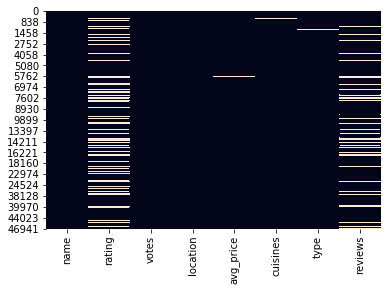

In [16]:
#visualize missing data
import seaborn as sns
sns.heatmap(zomato.isnull(), cbar=False)

From the visualization above, we can tell that most of the times when the values are missing in the 'rating' column, there tend to be missing values in other columns as well for that row. Most of the missing values are in either the 'rating' column, followed by the 'reviews' column. There are a few missing in the 'avg_price', 'cuisine' and 'type'. The columns that seem to have all rows with data are 'name','votes' amd 'location. But these columns need further inspection too. 

The entire idea of having the 'reviews' column was to impute values from that column into missing values in the 'rating' and 'voting' columns. However, as shown by the plot above, most of the rows that have missing values in 'rating' also have values missing in 'reviews' and 'voting'. 
A little calculation that I did on the side yielded around less than 5% of total missing values in 'rating' could be imputed from 'reviews', which isn't significant at all. Instead, I'm going to drop all the missing values. 

In [17]:
#dropping missing values from the columns 'rating','cuisines','type'
zomato=zomato.dropna(subset=['rating','cuisines','type'])
zomato.isnull().sum()
#test[test['avg_price'].isnull()]
#zomato.isnull().sum()

name           0
rating         0
votes          0
location       0
avg_price     32
cuisines       0
type           0
reviews      322
dtype: int64

After dropping missing values from columns that couldn't be replaced with any other value, we still have 32 missing values in the 'avg_price' column. However, in this case, instead of dropping the values we can opt to impute the mean price of restaurents in that location. This would be better than dropping entire rows just because of missing values in one column that we can replace with an estimate. 

Before I can impute values, some further cleaning needs to be done in the 'avg_price' column. Namely, I have to drop the ',' chharacter present in the rows, and then convert the values to float to compute the mean. 

In [18]:
#remove commas in avg_price, and convert column to float
zomato['avg_price']=zomato['avg_price'].str.replace(",","")
zomato['avg_price'] = pd.to_numeric(zomato['avg_price'],errors='coerce')

#impute values with mean avg_price according to location, round the values to the nearest whole number
zomato['avg_price']=zomato.groupby('location')['avg_price'].transform(lambda x: x.fillna(np.round(x.mean())))


In [19]:
zomato.isnull().sum()

name           0
rating         0
votes          0
location       0
avg_price      0
cuisines       0
type           0
reviews      322
dtype: int64

Now there are no missing values in any required columns, and we are left with a relatively clean dataset. 

# Visualization:

We first have to convert the 'rating' column from string to float. Remember, we performed some string functions on it to clean it before, but now in order to perform visiualizations it needs to be converted. 

The following is bar plot that shows the top 25 locations of Bangalore with the best restaurants by average rating. 

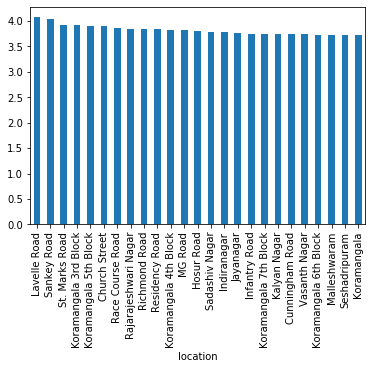

In [20]:
zomato['rating'] = pd.to_numeric(zomato['rating'],errors='coerce')
zomato.groupby('location')['rating'].mean().sort_values(ascending=False).head(25).plot.bar(x='location',y='rating')

The following is a scatter plot of number of 'votes' vs 'rating'. From the scatter plot, we can tell that there does not seem to be a correlation between the two values.

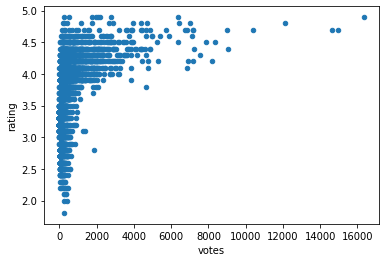

In [23]:
#zomato.dropna(subset=['votes'])
zomato.plot.scatter(x='votes',y='rating')
plt.show()
